In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the datasets
candidates_2009=pd.read_csv('LS2009Candidate.csv')
candidates_2009.head()

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0


In [3]:
candidates_2009.shape

(8070, 14)

In [4]:
electors=pd.read_csv('ELectors.csv')
electors.isnull().sum()

STATE CODE                    0
STATE                         0
PC NO                         0
PARLIAMENTARY CONSTITUENCY    0
Total voters                  0
Total_Electors                0
TOT_CONTESTANT                0
POLL PERCENTAGE               0
dtype: int64

# Task 1: Plot a bar graph for comparision between male and female candidates

In [5]:
#Finding the value counts of both the genders
gender = candidates_2009['Candidate Sex'].value_counts()
gender

M    7475
F     552
Name: Candidate Sex, dtype: int64

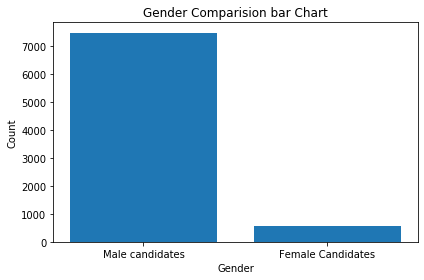

In [6]:
count=[gender[0],gender[1]]
x=['Male candidates','Female Candidates']
plt.bar(x,count)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Comparision bar Chart')
plt.tight_layout()
plt.show()

# Task 2: Plot a histogram of the age of all the candidates as well as of the winner amangst them.Compare them and note an observation

In [7]:
#Selecting the subset of the data with winner candidates
winners=candidates_2009[candidates_2009.Position==1]
winners['Candidate Age'].describe()

count    541.000000
mean      53.059150
std       11.215739
min       26.000000
25%       45.000000
50%       53.000000
75%       60.000000
max       88.000000
Name: Candidate Age, dtype: float64

In [8]:
pd.DataFrame({'winner':winners['Candidate Age'].describe(),'all':candidates_2009['Candidate Age'].describe()})

,winner,all
count,541.000000,8027.000000
mean,53.059150,45.837673
std,11.215739,11.863180
min,26.000000,25.000000
25%,45.000000,36.000000
50%,53.000000,45.000000
75%,60.000000,54.000000
max,88.000000,99.000000


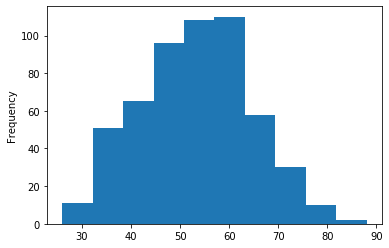

In [9]:
result=winners['Candidate Age']
result.plot.hist()

Text(0.5, 1.0, 'Winner candidates')

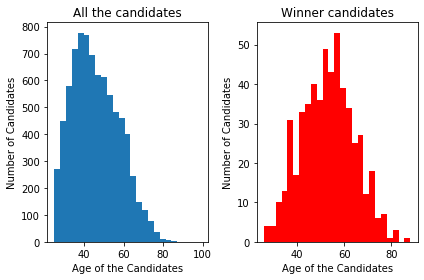

In [10]:
fig,ax=plt.subplots(nrows=1,ncols=2,tight_layout =True)
ax[0].hist(list(candidates_2009['Candidate Age']),bins=25)
ax[0].set_xlabel('Age of the Candidates')
ax[0].set_ylabel('Number of Candidates')
ax[0].set_title('All the candidates')

ax[1].hist(list(winners['Candidate Age']),bins=25,color = 'red')
ax[1].set_xlabel('Age of the Candidates')
ax[1].set_ylabel('Number of Candidates')
ax[1].set_title('Winner candidates')

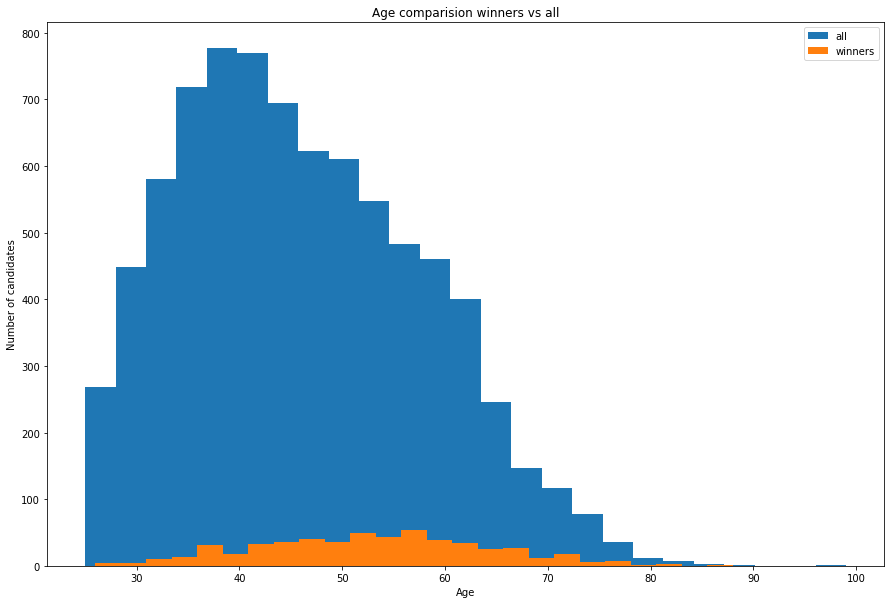

In [11]:
bins=25
plt.figure(figsize=(15,10))
candidates_2009['Candidate Age'].plot.hist(bins=bins,label='all')
winners=candidates_2009[candidates_2009.Position==1]
winners['Candidate Age'].plot.hist(bins=bins,label='winners')
plt.legend(loc='upper right')
plt.title('Age comparision winners vs all')
plt.xlabel('Age')
plt.ylabel('Number of candidates')
plt.show()

##Insight: Mostly older candidates are the winners(50-60)

# Task 3:Plot a bar graph to get the vote shares of different parties

In [14]:
candidates_2009.columns

Index(['ST_CODE', 'State name', 'Month', 'Year', 'PC Number', 'PC name',
       'PC Type', 'Candidate Name', 'Candidate Sex', 'Candidate Category',
       'Candidate Age', 'Party Abbreviation', 'Total Votes Polled',
       'Position'],
      dtype='object')

In [20]:
candidates_2009[['Party Abbreviation','Total Votes Polled']]

,Party Abbreviation,Total Votes Polled
0,TDP,372268.0
1,INC,257181.0
2,PRAP,112930.0
3,BJP,57931.0
4,BSP,16471.0
...,...,...
8065,IND,422.0
8066,IND,378.0
8067,IND,378.0
8068,IND,375.0


Text(0, 0.5, 'No of votes in millions')

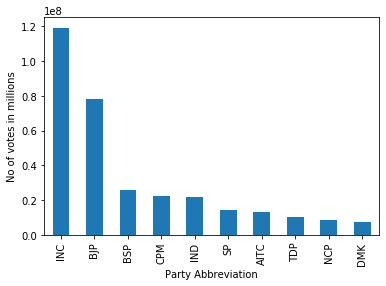

In [26]:
candidates_2009.groupby('Party Abbreviation')['Total Votes Polled'].sum().sort_values(ascending=False)[:10].plot.bar()
plt.ylabel('No of votes in millions')

In [27]:
##INC is the most voted party.

Text(0.5, 1.0, 'Vote Shares')

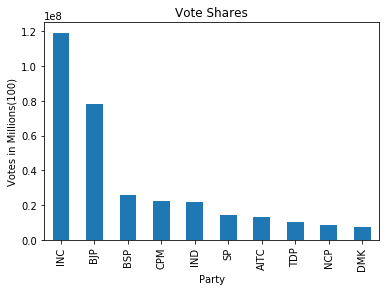

In [31]:
# Group the dataframe by 'Party_Abbreviation' and sum the 'Total _Votes_Polled'
vote_share = candidates_2009.groupby('Party Abbreviation')['Total Votes Polled'].sum()

# Plot the vote share with respect to different parties
party_vote_share = vote_share.sort_values(ascending=False)[:10].plot(kind='bar')
party_vote_share.set_xlabel('Party')
party_vote_share.set_ylabel('Votes in Millions(100)')
party_vote_share.set_title('Vote Shares')

# Task 4:Compare the mean poll percentage of all the states

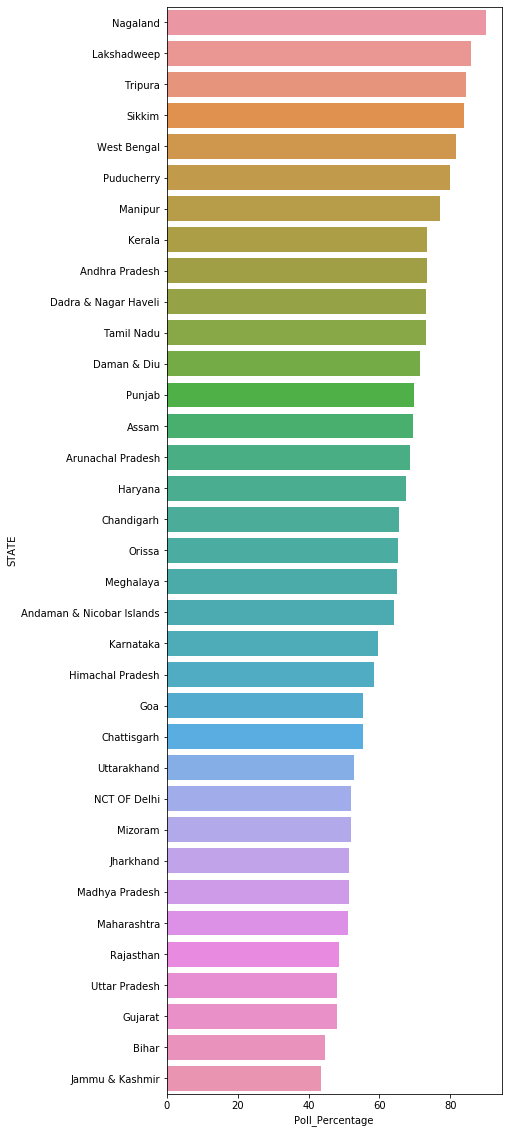

In [33]:
import seaborn as sns

# Mean statistics of all the states
poll_percentage = electors.groupby('STATE').mean()

# Creating a dictionary of states and poll percentage
polls = poll_percentage[['POLL PERCENTAGE']].sort_values('POLL PERCENTAGE',ascending = False).to_dict()

# States and their poll percentage
states = list(polls['POLL PERCENTAGE'].keys())
state_percentage = list(polls['POLL PERCENTAGE'].values())

# Creating a dataframe
Data = {'STATE':states,'Poll_Percentage':state_percentage}
DF = pd.DataFrame(data=Data)

# Generating a bar plot
ax = plt.subplots(figsize=(6, 20))

sns.barplot(x=DF.Poll_Percentage,y=DF.STATE)

# Insight: Four out of the top five states with respect to polling percentages are a part of the north-east India which is considered to be amongst the least developed parts of India.


# Task 5: Plot a bar plotto compare the seats won by different parties in Uttar Pradesh

Text(0.5, 1.0, 'UP seats comparison')

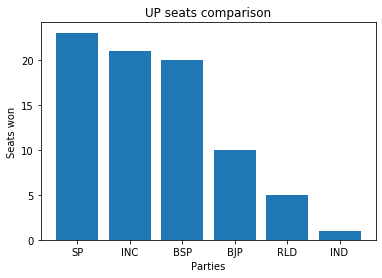

In [35]:
UP_win = candidates_2009[(candidates_2009['Position'] == 1.0) & (candidates_2009['State name'] == 'Uttar Pradesh') ]

UP = UP_win['Party Abbreviation'].value_counts().to_dict()

plt.bar(UP.keys(),UP.values())

plt.xlabel('Parties')

plt.ylabel('Seats won')

plt.title('UP seats comparison')

# Insights: As mentioned earlier regional parties have major influencies, the highest number of seats won in UP is by Samajwadi Party(SP). Also, the Bahujan Samaj Party(BSP) is trailing behind INC only by a few seats.

In [37]:
electors.columns

Index(['STATE CODE', 'STATE', 'PC NO', 'PARLIAMENTARY CONSTITUENCY',
       'Total voters', 'Total_Electors', 'TOT_CONTESTANT', 'POLL PERCENTAGE'],
      dtype='object')

# Task 6:Plot a pie chart with the top 10 parties with majority seats in the elections.

(-1.1324296122098951,
 1.1015442714170582,
 -1.1023350197623656,
 1.1263438506116112)

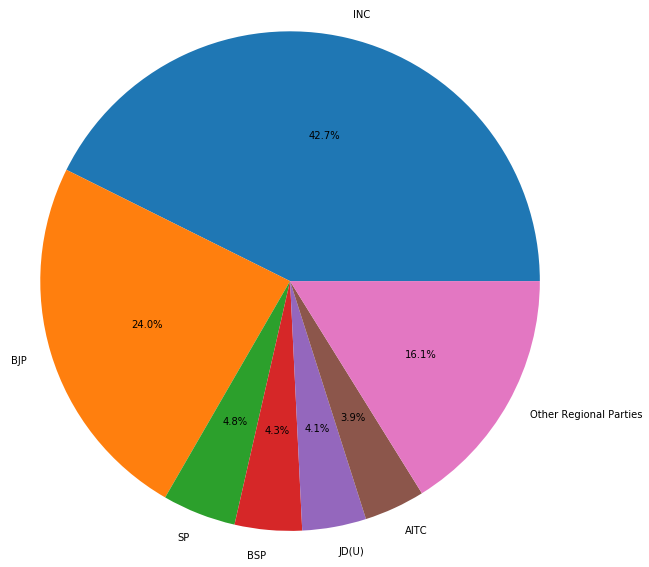

In [38]:
# Candidates with 1st position in their respective constituiency
winner = candidates_2009[candidates_2009.Position == 1]

# Find the parties with the number of seats won by them 
final = winner['Party Abbreviation'].value_counts()[:6].to_dict()

# count of other regional parties
final['Other Regional Parties'] = sum(winner['Party Abbreviation'].value_counts()) - sum(winner['Party Abbreviation'].value_counts()[:10])

# Pie chart
plt.figure(figsize = (10,10))
plt.pie(final.values(),labels= final.keys(), autopct='%1.1f%%')
plt.axis('equal')

# Insight : INC have won almost 43 % of the total seats followed by BJP with 24% seats

# Task 7:Plot a horizontal bar graph of the Parliamentary constituency with total voters less than 100000.

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]),
 <a list of 7 Text xticklabel objects>)

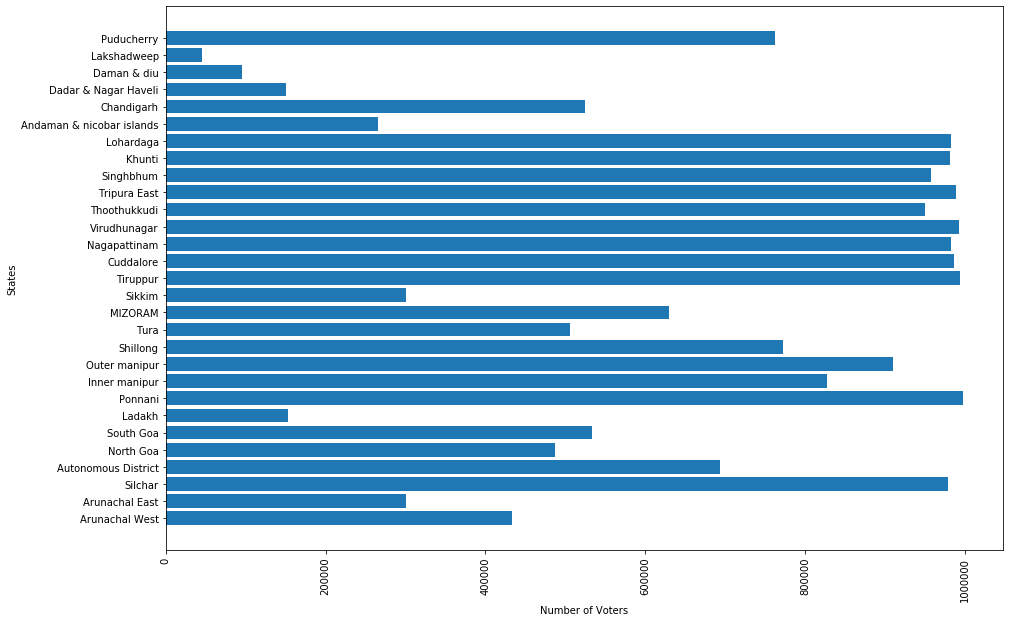

In [39]:
# Constituency with less than 100000 voters
voters = electors[electors.Total_Electors < 1000000]

# Plot a horizontal bar graph to compare constituencies with less than 1000000 voters
plt.figure(figsize=(15,10))

plt.barh(voters['PARLIAMENTARY CONSTITUENCY']  ,voters.Total_Electors)

plt.xlabel('Number of Voters')

plt.ylabel('States')

plt.xticks(rotation = 90)

In [40]:
#Most of the winner candidates are from general category with UPA having the highest number of SC candidates.

# Task 8: Plot a pie diagram for the top 9 states with most number of seats.

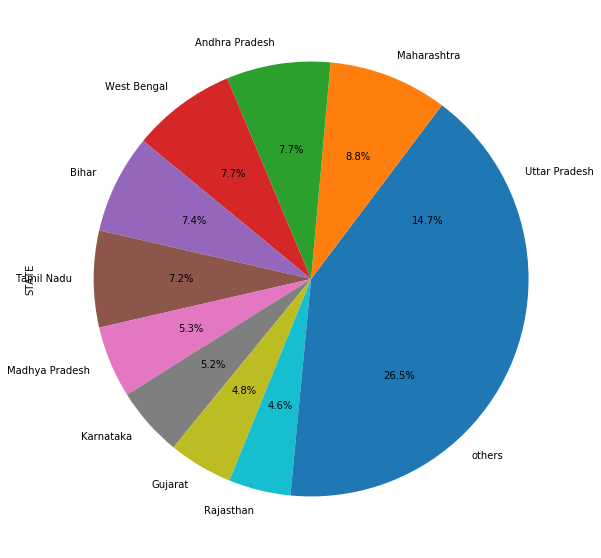

In [42]:
top_10_seats=electors['STATE'].value_counts()[:10]
top_10_seats['others']=electors['STATE'].value_counts().sum()-top_10_seats.sum()
top_10_seats.plot.pie(autopct='%1.1f%%',figsize=(10,10))